In [1]:
# ===================================
# 1. Import libraries
# ===================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from time import time

from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# models
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


In [188]:
# ===================================
# 2. Load dataset
# ===================================
df = pd.read_csv("EDA_final_24-08.csv")   # replace with your dataset


In [190]:
# Apply one-hot encoding
df = pd.get_dummies(df, columns=['Salesperson', 'ProductClass', 'CustomerClass'], drop_first=True)


In [192]:
# Features (X) and target (y)
X = df.drop(columns=['TargetSales'])  # Drop the target variable
y = df['TargetSales']


In [194]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]} rows")
print(f"Test set size: {X_test.shape[0]} rows")


Training set size: 45771 rows
Test set size: 11443 rows


XGBOOST

In [197]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

In [199]:
# Initialize the XGBoost regressor model
model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Train the model
model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [201]:
# Predict on the test set
y_pred = model.predict(X_test)

In [203]:
# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R2 Score: {r2}")

Mean Squared Error: 1004597.2747184531
Root Mean Squared Error: 1004597.2747184531
R2 Score: 0.9999564390113195


XGBOOST - HYPERPARAMETER TUNING

In [206]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb


In [208]:
# Define the parameter grid for tuning
xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

In [210]:
# Initialize XGBoost Regressor
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Apply GridSearchCV
xgb_grid_search = GridSearchCV(estimator=xgb_model, param_grid=xgb_param_grid, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
xgb_grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, feature_weights=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.3],
                         'max_depth': [3, 6, 10],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 1.0]},
             scoring='neg_mean_squared_error', verbose=2)

In [211]:
# Best parameters and model
best_xgb_model = xgb_grid_search.best_estimator_
best_params_xgb = xgb_grid_search.best_params_
print(f"Best parameters for XGBoost: {best_params_xgb}")

Best parameters for XGBoost: {'colsample_bytree': 1.0, 'learning_rate': 0.3, 'max_depth': 10, 'n_estimators': 200, 'subsample': 1.0}


In [212]:
# Evaluate the tuned model
y_pred_xgb_best = best_xgb_model.predict(X_test)
mse_xgb_best = mean_squared_error(y_test, y_pred_xgb_best)
rmse_xgb_best = mean_squared_error(y_test, y_pred_xgb_best)
r2_xgb_best = r2_score(y_test, y_pred_xgb_best)

print(f"Tuned XGBoost - MSE: {mse_xgb_best}")
print(f"Tuned XGBoost - RMSE: {rmse_xgb_best}")
print(f"Tuned XGBoost - R2 Score: {r2_xgb_best}")

Tuned XGBoost - MSE: 2941.1840092501834
Tuned XGBoost - RMSE: 2941.1840092501834
Tuned XGBoost - R2 Score: 0.9999998724654281


RandomForest

In [213]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [214]:
# Initialize the Random Forest regressor
rf_model = RandomForestRegressor(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [215]:
# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model performance
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - MSE: {mse_rf}")
print(f"Random Forest - RMSE: {rmse_rf}")
print(f"Random Forest - R2 Score: {r2_rf}")

Random Forest - MSE: 22683.289649644077
Random Forest - RMSE: 22683.289649644077
Random Forest - R2 Score: 0.9999990164152854


RANDOM FOREST - HYPERPARAMETER TUNING

In [217]:
from sklearn.ensemble import RandomForestRegressor

In [218]:
# Define the parameter grid for tuning
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [219]:
# Initialize Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

# Apply GridSearchCV
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
rf_grid_search.fit(X_train, y_train)


Fitting 3 folds for each of 162 candidates, totalling 486 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=2)

In [220]:
# Best parameters and model
best_rf_model = rf_grid_search.best_estimator_
best_params_rf = rf_grid_search.best_params_
print(f"Best parameters for Random Forest: {best_params_rf}")

Best parameters for Random Forest: {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [221]:
# Evaluate the tuned model
y_pred_rf_best = best_rf_model.predict(X_test)
mse_rf_best = mean_squared_error(y_test, y_pred_rf_best)
rmse_rf_best = mean_squared_error(y_test, y_pred_rf_best)
r2_rf_best = r2_score(y_test, y_pred_rf_best)

print(f"Tuned Random Forest - MSE: {mse_rf_best}")
print(f"Tuned Random Forest - RMSE: {rmse_rf_best}")
print(f"Tuned Random Forest - R2 Score: {r2_rf_best}")  

Tuned Random Forest - MSE: 1.38322259349415e-15
Tuned Random Forest - RMSE: 1.38322259349415e-15
Tuned Random Forest - R2 Score: 1.0


LINEAR REGRESSION

In [128]:
from sklearn.linear_model import LinearRegression

In [130]:
# Initialize the Linear Regression model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train, y_train)

LinearRegression()

In [132]:
# Predict on the test set
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model performance
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression - MSE: {mse_lr}")
print(f"Linear Regression - RMSE: {rmse_lr}")
print(f"Linear Regression - R2 Score: {r2_lr}")

Linear Regression - MSE: 1722244842.8772943
Linear Regression - RMSE: 1722244842.8772943
Linear Regression - R2 Score: 0.9253206334580817


LINEAR REGRESSION HYPERTUNING

In [41]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [272]:
# Define the parameter grid for tuning
lr_param_grid = {
    'alpha': [0.1, 1, 10, 100]  # Regularization strength for Ridge
}

# Initialize Ridge (Linear Regression with L2 regularization)
lr_model = Ridge(solver="lsqr", random_state=42)

In [274]:
# Apply GridSearchCV
lr_grid_search = GridSearchCV(estimator=lr_model, param_grid=lr_param_grid, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
lr_grid_search.fit(X_train, y_train)

# Best parameters and model
best_lr_model = lr_grid_search.best_estimator_
best_params_lr = lr_grid_search.best_params_
print(f"Best parameters for Linear Regression: {best_params_lr}")

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best parameters for Linear Regression: {'alpha': 0.1}


In [276]:
# Evaluate the tuned model
y_pred_lr_best = best_lr_model.predict(X_test)
mse_lr_best = mean_squared_error(y_test, y_pred_lr_best)
rmse_lr_best = mean_squared_error(y_test, y_pred_lr_best)
r2_lr_best = r2_score(y_test, y_pred_lr_best)

print(f"Tuned Linear Regression - MSE: {mse_lr_best}")
print(f"Tuned Linear Regression - RMSE: {rmse_lr_best}")
print(f"Tuned Linear Regression - R2 Score: {r2_lr_best}")


Tuned Linear Regression - MSE: 23043664160.662735
Tuned Linear Regression - RMSE: 23043664160.662735
Tuned Linear Regression - R2 Score: 0.000788854476710843


GRADIENT BOOSTING

In [118]:
from sklearn.ensemble import GradientBoostingRegressor

In [120]:
# Initialize the Gradient Boosting regressor
gb_model = GradientBoostingRegressor(random_state=42)

# Train the model
gb_model.fit(X_train, y_train)


GradientBoostingRegressor(random_state=42)

In [121]:
# Predict on the test set
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model performance
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Gradient Boosting - MSE: {mse_gb}")
print(f"Gradient Boosting - RMSE: {rmse_gb}")
print(f"Gradient Boosting - R2 Score: {r2_gb}")

Gradient Boosting - MSE: 316155610.2872216
Gradient Boosting - RMSE: 316155610.2872216
Gradient Boosting - R2 Score: 0.9862909732013025


Hyperparameter Tuning for Gradient Boosting

In [57]:
from sklearn.ensemble import GradientBoostingRegressor

In [58]:
# Define the parameter grid for tuning
gb_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 1.0]
}

# Initialize Gradient Boosting model
gb_model = GradientBoostingRegressor(random_state=42)

In [59]:
# Apply GridSearchCV
gb_grid_search = GridSearchCV(estimator=gb_model, param_grid=gb_param_grid, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
gb_grid_search.fit(X_train, y_train)

# Best parameters and model
best_gb_model = gb_grid_search.best_estimator_
best_params_gb = gb_grid_search.best_params_
print(f"Best parameters for Gradient Boosting: {best_params_gb}")

Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.8}


In [114]:
# Evaluate the tuned model
y_pred_gb_best = best_gb_model.predict(X_test)
mse_gb_best = mean_squared_error(y_test, y_pred_gb_best)
rmse_gb_best = mean_squared_error(y_test, y_pred_gb_best)
r2_gb_best = r2_score(y_test, y_pred_gb_best)

print(f"Tuned Gradient Boosting - MSE: {mse_gb_best}")
print(f"Tuned Gradient Boosting - RMSE: {rmse_gb_best}")
print(f"Tuned Gradient Boosting - R2 Score: {r2_gb_best}")

Tuned Gradient Boosting - MSE: 7852.271311064046
Tuned Gradient Boosting - RMSE: 7852.271311064046
Tuned Gradient Boosting - R2 Score: 0.9999996595126124


KNN

In [102]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [104]:
# Initialize the KNN regressor with n_neighbors set to 5 (you can adjust this)
knn_model = KNeighborsRegressor(n_neighbors=5)

# Train the model
knn_model.fit(X_train, y_train)

KNeighborsRegressor()

In [108]:
# Predict on the test set
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model performance
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print(f"KNN - MSE: {mse_knn}")
print(f"KNN - RMSE: {rmse_knn}")
print(f"KNN - R2 Score: {r2_knn}")

KNN - MSE: 16857009301.677525
KNN - RMSE: 16857009301.677525
KNN - R2 Score: 0.26905237565562945


Hyperparameter Tuning for K-Nearest Neighbors (KNN)

In [66]:
from sklearn.neighbors import KNeighborsRegressor

In [67]:
# Define the parameter grid for tuning
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 10],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1: Manhattan distance, 2: Euclidean distance
}

# Initialize KNN model
knn_model = KNeighborsRegressor()

# Apply GridSearchCV
knn_grid_search = GridSearchCV(estimator=knn_model, param_grid=knn_param_grid, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
knn_grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


GridSearchCV(cv=3, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7, 10], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='neg_mean_squared_error', verbose=2)

In [68]:
# Best parameters and model
best_knn_model = knn_grid_search.best_estimator_
best_params_knn = knn_grid_search.best_params_
print(f"Best parameters for KNN: {best_params_knn}")


Best parameters for KNN: {'n_neighbors': 10, 'p': 1, 'weights': 'distance'}


In [96]:
# Evaluate the tuned model
y_pred_knn_best = best_knn_model.predict(X_test)
mse_knn_best = mean_squared_error(y_test, y_pred_knn_best)
rmse_knn_best = mean_squared_error(y_test, y_pred_knn_best)
r2_knn_best = r2_score(y_test, y_pred_knn_best)

print(f"Tuned KNN - MSE: {mse_knn_best}")
print(f"Tuned KNN - RMSE: {rmse_knn_best}")
print(f"Tuned KNN - R2 Score: {r2_knn_best}")

Tuned KNN - MSE: 11102016779.711823
Tuned KNN - RMSE: 11102016779.711823
Tuned KNN - R2 Score: 0.5185983085532182


Evaluation

In [233]:
from sklearn.metrics import root_mean_squared_error

In [235]:
def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    rmse = root_mean_squared_error(y_test, y_pred)   # <-- updated
    mae = mean_absolute_error(y_test, y_pred)
    mask = np.array(y_test) != 0
    mape = np.mean(np.abs((np.array(y_test)[mask] - y_pred[mask]) / np.array(y_test)[mask]))*100 if mask.any() else np.nan
    r2 = r2_score(y_test, y_pred)
    return [name, rmse, mae, mape, r2]

In [237]:
results = []

# Add whichever tuned models you have
results.append(evaluate_model("XGBoost", best_xgb_model, X_test, y_test))
results.append(evaluate_model("Random Forest", best_rf_model, X_test, y_test))
results.append(evaluate_model("Gradient Boosting", best_gb_model, X_test, y_test))
results.append(evaluate_model("Linear Regression", best_lr_model, X_test, y_test))
results.append(evaluate_model("KNN", best_knn_model, X_test, y_test))

import pandas as pd
df_results = pd.DataFrame(results, columns=["Model", "RMSE", "MAE", "MAPE (%)", "R²"])
display(df_results.sort_values(by="RMSE"))


,Model,RMSE,MAE,MAPE (%),R²
1,Random Forest,3.719170e-08,2.465848e-08,7.486402e-12,1.000000
0,XGBoost,5.423268e+01,1.232943e+00,8.166170e-02,1.000000
2,Gradient Boosting,8.861304e+01,1.002111e+01,8.407644e-02,1.000000
3,Linear Regression,4.149987e+04,2.647452e+04,2.488003e+02,0.925321
4,KNN,1.053661e+05,7.031622e+04,3.879936e+02,0.518598


In [239]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, root_mean_squared_error
from sklearn.model_selection import cross_val_score, learning_curve


In [249]:
def review_model(name, model, X_train, y_train, X_test, y_test):
    print(f"\n🔎 {name} Evaluation")
    
    # Predictions
    y_pred = model.predict(X_test)

    # Metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)   # ✅ correct RMSE
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"MSE  : {mse:.3f}")
    print(f"RMSE : {rmse:.3f}")
    print(f"MAE  : {mae:.3f}")
    print(f"R²   : {r2:.6f}")

    # Cross-validation
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring="r2")
    print(f"CV R² mean: {np.mean(scores):.4f} ± {np.std(scores):.4f}")

    # Plot Pred vs Actual
    plt.figure(figsize=(5,5))
    plt.scatter(y_test, y_pred, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel("Actual"); plt.ylabel("Predicted")
    plt.title(f"{name} - Pred vs Actual")
    plt.show()

    # Plot Residuals
    residuals = y_test - y_pred
    plt.figure(figsize=(5,4))
    plt.scatter(y_pred, residuals, alpha=0.6)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel("Predicted"); plt.ylabel("Residuals")
    plt.title(f"{name} - Residuals")
    plt.show()

    # Learning curve
    train_sizes, train_scores, val_scores = learning_curve(
        model, X_train, y_train, cv=5, scoring="r2",
        train_sizes=np.linspace(0.1, 1.0, 6), n_jobs=-1
    )
    plt.figure(figsize=(6,4))
    plt.plot(train_sizes, train_scores.mean(axis=1), 'o-', label="Train R²")
    plt.plot(train_sizes, val_scores.mean(axis=1), 'o-', label="CV R²")
    plt.fill_between(train_sizes,
                     val_scores.mean(axis=1)-val_scores.std(axis=1),
                     val_scores.mean(axis=1)+val_scores.std(axis=1), alpha=0.2)
    plt.xlabel("Training samples"); plt.ylabel("R²")
    plt.title(f"{name} - Learning Curve")
    plt.legend()
    plt.show()



🔎 Random Forest Evaluation
MSE  : 0.000
RMSE : 0.000
MAE  : 0.000
R²   : 1.000000
CV R² mean: 0.9999 ± 0.0003


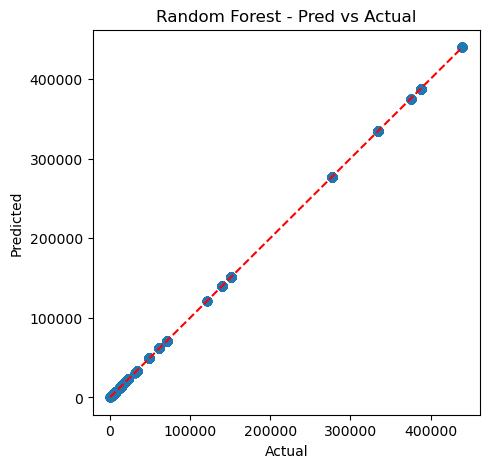

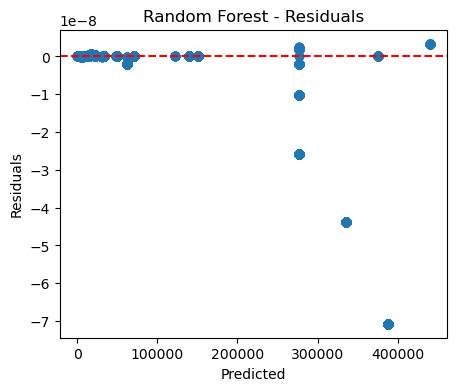

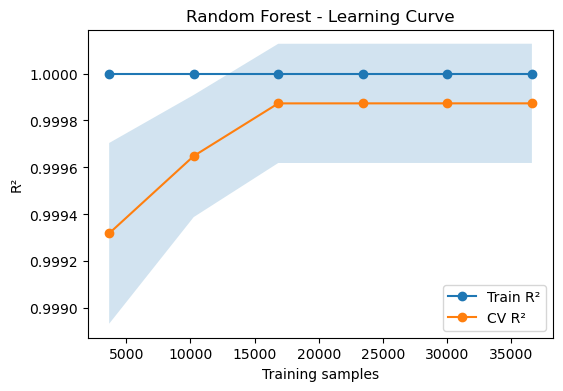

In [251]:
review_model("Random Forest", best_rf_model, X_train, y_train, X_test, y_test)



🔎 XGBoost Evaluation
MSE  : 2941.184
RMSE : 54.233
MAE  : 1.233
R²   : 1.000000
CV R² mean: 0.9999 ± 0.0003


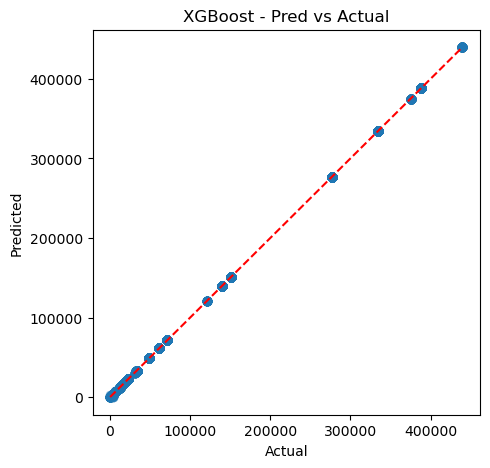

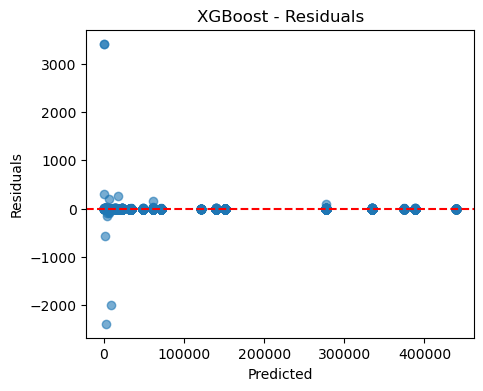

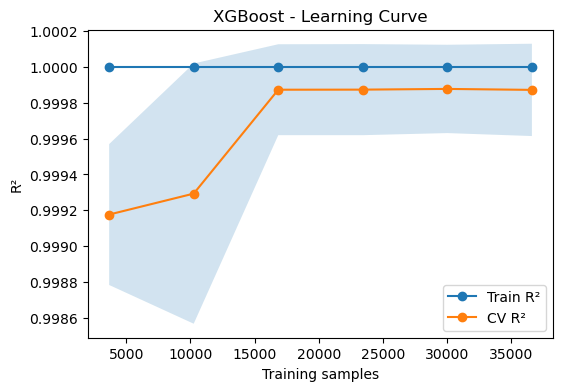

In [252]:
review_model("XGBoost", best_xgb_model, X_train, y_train, X_test, y_test)


FINAL BEST MODEL - XGBOOST

In [258]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, root_mean_squared_error

# Predictions
y_pred_xgb = best_xgb_model.predict(X_test)

# Metrics
mse = mean_squared_error(y_test, y_pred_xgb)
rmse = root_mean_squared_error(y_test, y_pred_xgb)
mae = mean_absolute_error(y_test, y_pred_xgb)
r2 = r2_score(y_test, y_pred_xgb)

print("🔎 Final XGBoost Evaluation")
print(f"MSE  : {mse:.3f}")
print(f"RMSE : {rmse:.3f}")
print(f"MAE  : {mae:.3f}")
print(f"R²   : {r2:.6f}")


🔎 Final XGBoost Evaluation
MSE  : 2941.184
RMSE : 54.233
MAE  : 1.233
R²   : 1.000000


In [260]:
from sklearn.model_selection import cross_val_score
import numpy as np

scores = cross_val_score(best_xgb_model, X, y, cv=5, scoring="r2")
print("Cross-Validation R² scores:", scores)
print("Mean R²:", np.mean(scores))


Cross-Validation R² scores: [0.99889123 1.         1.         0.99999998 0.99999959]
Mean R²: 0.9997781609821658


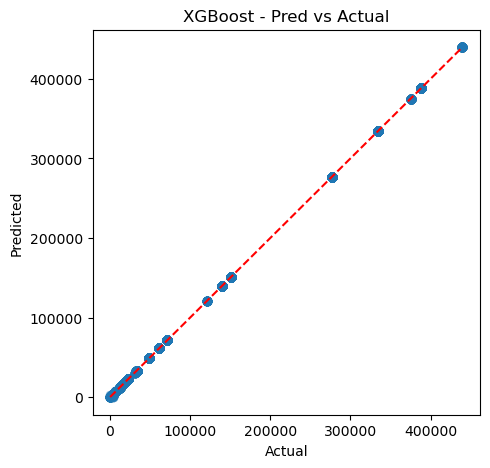

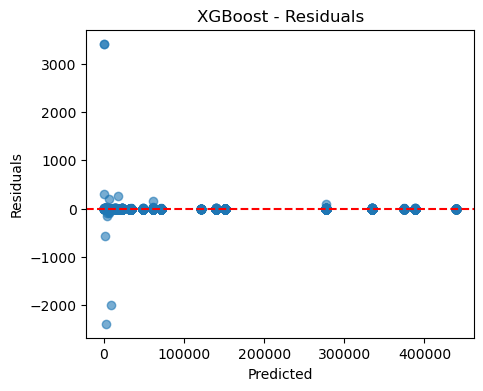

In [262]:
import matplotlib.pyplot as plt

# Pred vs Actual
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred_xgb, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual"); plt.ylabel("Predicted")
plt.title("XGBoost - Pred vs Actual")
plt.show()

# Residuals
residuals = y_test - y_pred_xgb
plt.figure(figsize=(5,4))
plt.scatter(y_pred_xgb, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted"); plt.ylabel("Residuals")
plt.title("XGBoost - Residuals")
plt.show()


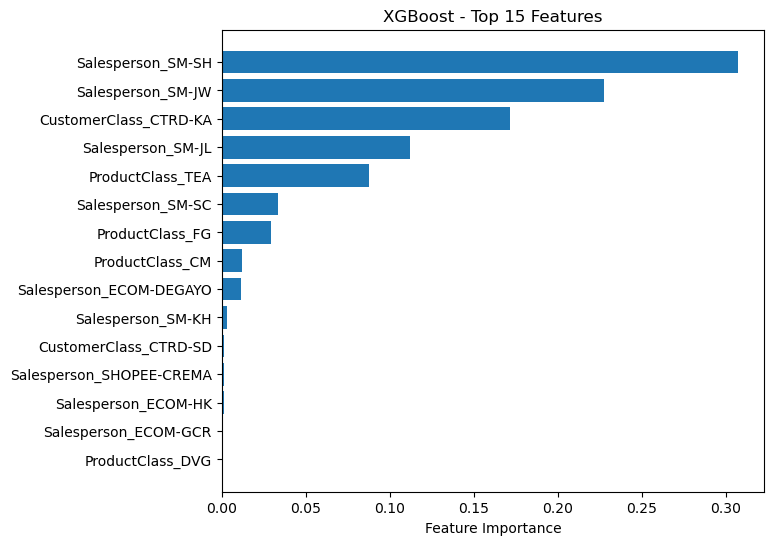

In [264]:
importances = best_xgb_model.feature_importances_
indices = np.argsort(importances)[-15:]  # Top 15 features

plt.figure(figsize=(7,6))
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel("Feature Importance")
plt.title("XGBoost - Top 15 Features")
plt.show()


In [270]:
import joblib

# Save (overwrite) the existing best_model.pkl
joblib.dump(best_xgb_model, "models/best_model.pkl")

# Optionally save the feature columns again if needed
joblib.dump(list(X.columns), "models/feature_columns.pkl")


['models/feature_columns.pkl']

In [268]:
# Collect results from your tuned models
results = []

# XGBoost
y_pred_xgb = best_xgb_model.predict(X_test)
results.append([
    "XGBoost",
    root_mean_squared_error(y_test, y_pred_xgb),
    mean_absolute_error(y_test, y_pred_xgb),
    r2_score(y_test, y_pred_xgb)
])

# Random Forest
y_pred_rf = best_rf_model.predict(X_test)
results.append([
    "Random Forest",
    root_mean_squared_error(y_test, y_pred_rf),
    mean_absolute_error(y_test, y_pred_rf),
    r2_score(y_test, y_pred_rf)
])

# Gradient Boosting
y_pred_gb = best_gb_model.predict(X_test)
results.append([
    "Gradient Boosting",
    root_mean_squared_error(y_test, y_pred_gb),
    mean_absolute_error(y_test, y_pred_gb),
    r2_score(y_test, y_pred_gb)
])

# Linear Regression
y_pred_lr = best_lr_model.predict(X_test)
results.append([
    "Linear Regression",
    root_mean_squared_error(y_test, y_pred_lr),
    mean_absolute_error(y_test, y_pred_lr),
    r2_score(y_test, y_pred_lr)
])

# KNN
y_pred_knn = best_knn_model.predict(X_test)
results.append([
    "KNN",
    root_mean_squared_error(y_test, y_pred_knn),
    mean_absolute_error(y_test, y_pred_knn),
    r2_score(y_test, y_pred_knn)
])

# Convert to DataFrame
df_results = pd.DataFrame(
    results, 
    columns=["Model", "RMSE", "MAE", "R²"]
).sort_values(by="RMSE")

display(df_results)


,Model,RMSE,MAE,R²
1,Random Forest,3.719170e-08,2.465848e-08,1.000000
0,XGBoost,5.423268e+01,1.232943e+00,1.000000
2,Gradient Boosting,8.861304e+01,1.002111e+01,1.000000
3,Linear Regression,4.149987e+04,2.647452e+04,0.925321
4,KNN,1.053661e+05,7.031622e+04,0.518598
